In [1]:
from sleepeeg.dashboard import create_dashboard

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\resampled_250hz_raw.fif...
    Reading extended channel information
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\resampled_250hz_raw-1.fif...
    Reading extended channel information
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.
Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 2751 samples (11.004 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   10.6s finished


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   10.3s finished


Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 220 sensor positions
Interpolating 37 sensors


Interpolated channels: ['E9', 'E18', 'E25', 'E31', 'E37', 'E39', 'E46', 'E62', 'E67', 'E68', 'E91', 'E93', 'E101', 'E111', 'E145', 'E156', 'E165', 'E166', 'E171', 'E174', 'E175', 'E181', 'E187', 'E198', 'E207', 'E209', 'E210', 'E214', 'E216', 'E217', 'E218', 'E219', 'E220', 'E226', 'E229', 'E232', 'E244']


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


average reference has been applied
Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\hz4-ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
Now restoring ICA solution ...
Ready.


Excluded ICA components: [29]


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 257 PCA components


Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.
Setting 166504 of 2229773 (7.47%) samples to NaN, retaining 2063269 (92.53%) samples.


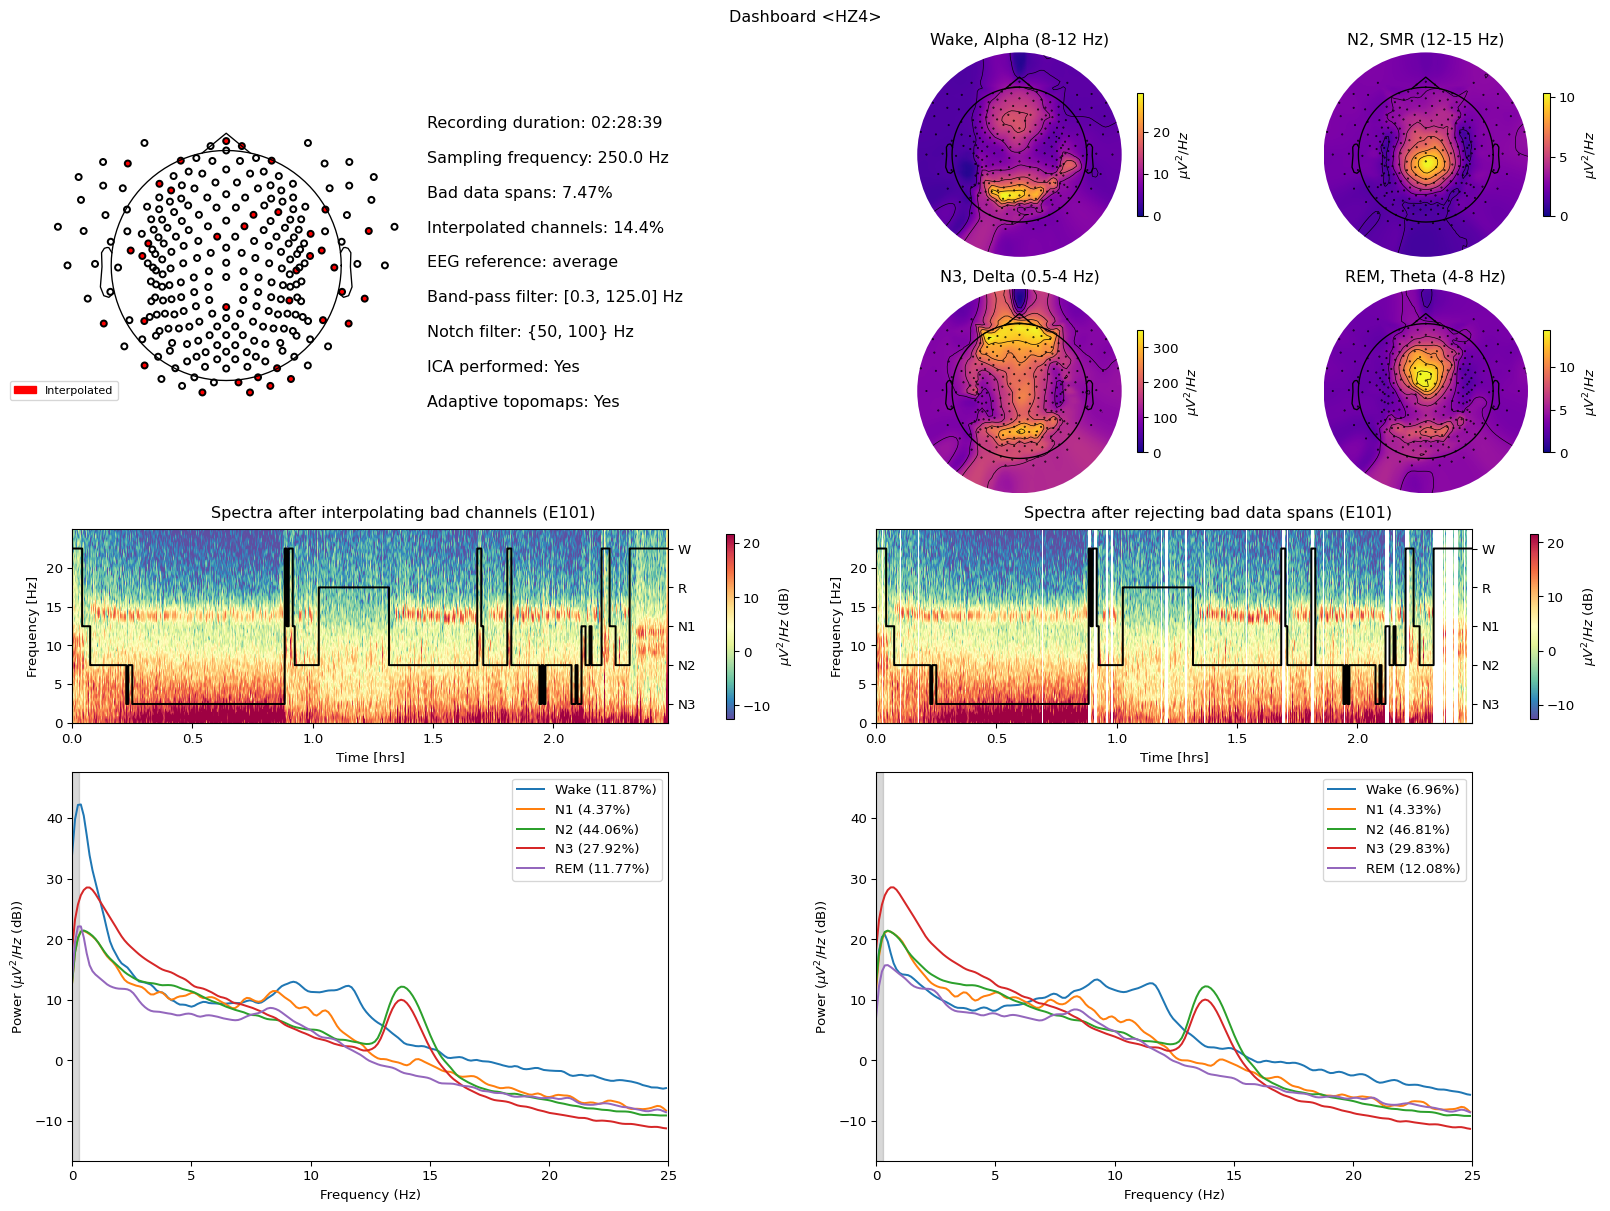

In [4]:
create_dashboard(
    subject_code="HZ4",
    # Can be either raw .mff or resampled, filtered or cleaned .fif file.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\resampled_250hz_raw.fif",
    # If you don't have a hypnogram, set it to None.
    path_to_hypnogram=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    # If you don't have a hypnogram, set it to None.
    hypno_freq=1,
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    # Can be set to None if path_to_eeg is a cleaned file with interpolated bad channels.
    path_to_bad_channels=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\bad_channels.txt",
    # Can be set to None if path_to_eeg is a cleaned file with annotated bad data spans.
    path_to_annotations=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\annotations.txt",
    # Reference to apply as mne's set_eeg_reference accepts.
    reference="average",
    # New sampling frequency in Hz. Can be None, if the eeg file is already resampled.
    resampling_freq=None,
    # Provide a tuple with two frequencies, e.g., (0.3, 40) for bandpass or (0.3, None) for highpass etc.
    # Can be None if the eeg file is already filtered.
    bandpass_filter_freqs=[0.3, None],
    # Channel to plot the spectrogram and PSD for.
    hypno_psd_pick=["E101"],
    # If you performed an ICA - provide here path to file 
    # with ICA components (including components selected for exclusion).
    path_to_ica_fif=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\hz4-ica.fif",
    # Whether to set manual topomap power limits.
    # Should be a list of 4 tuples of 2 floats, e.g., [(0,10),(0, 30),(0,50),(10, 100)]
    topomap_cbar_limits=None,
)